In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import simplify, diff, Matrix, lambdify, sin, cos, integrate, symbols
from sympy.abc import t
from sympy.solvers.solveset import linsolve
from sympy.physics.mechanics import init_vprinting, dynamicsymbols
from scipy.integrate import solve_ivp

init_vprinting()

In [38]:
q1, q2 = dynamicsymbols('q1 q2')
dq1, dq2 = dynamicsymbols('q1 q2', 1)
params = [q1, dq1, q2, dq2]
initial_conditions = [np.pi/18, 0, np.pi/6, 0]
time_interval = [0, 15]
l, m, g = 1, 1, 9.81
q1f, q2f = np.pi/6, np.pi/3
b01, g01, b12, g12 = 450, 300, 200, 300
IC1, IC2 = m*l**2/12, m*l**2/12
IA, IB = IC1 + m*(l/2)**2, IC2 + m*(l/2)**2

T01 = Matrix([0,0,-b01*dq1 - g01*(q1-q1f) + 0.5*g*l*m*cos(q1) + g*l*m*cos(q1)])
T12 = Matrix([0,0,-b12*dq2 - g12*(q2-q2f) + 0.5*g*l*m*cos(q2)])

omg1, omg2 = Matrix([0,0,dq1]), Matrix([0,0,dq2])
alp1, alp2 = diff(omg1), diff(omg2)
G1, G2 = Matrix([0,-m*g,0]), Matrix([0,-m*g,0])

rC1 = l/2 * Matrix([cos(q1), sin(q1), 0])
rC2 = 2*rC1 + l/2 * Matrix([cos(q2), sin(q2), 0])
vC1, vC2 = diff(rC1), diff(rC2)
aC1, aC2 = diff(vC1), diff(vC2)

# moment of inertia locates at rotational axis (point A)
T1 = IA*omg1.T*omg1/2
# moment of inertia locates at the center of mass of link 2
T2 = IC2*omg2.T*omg2/2 + m*vC2.T*vC2/2
T = T1 + T2

# external forces/moments acting on the system are G1, G2, T12, T01
Q1 = G1.T*diff(rC1,q1) + T01.T*diff(omg1,dq1) - T12.T*diff(omg1,dq1)\
       + G2.T*diff(rC2,q1) + T12.T*diff(omg2,dq1)
Q2 = G1.T*diff(rC1,q2) + T01.T*diff(omg1,dq2) - T12.T*diff(omg1,dq2)\
       + G2.T*diff(rC2,q2) + T12.T*diff(omg2,dq2)

eq1 = diff(T,dq1).diff(t) - T.diff(q1) - Q1
eq2 = diff(diff(dq2).diff(t) - T.diff(q2) - Q2

In [39]:
sol = list(linsolve([eq1[0],eq2[0]], (alp1[2], alp2[2])))[0]

In [40]:
dq1 = lambdify(params, dq1)
ddq1 = lambdify(params, sol[0])
dq2 = lambdify(params, dq2)
ddq2 = lambdify(params, sol[1])
fun = lambda time, y: [dq1(*y), ddq1(*y), dq2(*y), ddq2(*y)]
res = solve_ivp(fun, time_interval, initial_conditions,
               t_eval=np.linspace(*time_interval, 10000))

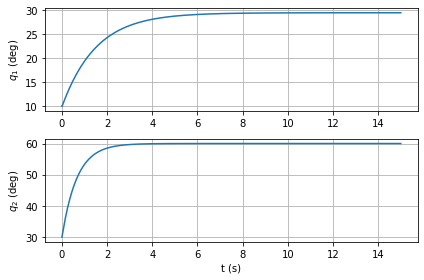

In [50]:
fig, ax = plt.subplots(nrows=2)
ax[0].plot(res.t, res.y[0]*180/np.pi)
ax[1].plot(res.t, res.y[2]*180/np.pi)
ax[0].grid()
ax[1].grid()
ax[0].set_ylabel(r'$q_1$ (deg)')
ax[1].set_ylabel(r'$q_2$ (deg)')
ax[1].set_xlabel(r't (s)')
plt.tight_layout()
plt.savefig('q1_q2_lagrantian.png', dpi=600)

Text(0.5, 0, 't (s)')

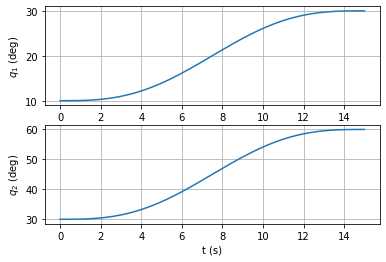

In [27]:
q10, q20, q1f, q2f = np.pi/18, np.pi/6, np.pi/6, np.pi/3
t = np.linspace(0,15,10000)
q1 = q10 + (q1f-q10)/15*(t - 15/(2*np.pi)*np.sin(2*np.pi*t/15))
q2 = q20 + (q2f-q20)/15*(t - 15/(2*np.pi)*np.sin(2*np.pi*t/15))

fig, ax = plt.subplots(nrows=2)
ax[0].plot(t, q1*180/np.pi)
ax[1].plot(t, q2*180/np.pi)
ax[0].grid()
ax[1].grid()
ax[0].set_ylabel(r'$q_1$ (deg)')
ax[1].set_ylabel(r'$q_2$ (deg)')
ax[1].set_xlabel(r't (s)')
# plt.tight_layout()
# plt.savefig('q1_q2_lagrantian.png', dpi=600)

In [7]:
T01_num = lambdify(params, T01[2])
T12_num = lambdify(params, T12[2])
T01_num(q1, res.y[1], q2, res.y[3])
T12_num(q1, res.y[1], q2, res.y[3])

array([161.32748729,  54.80145677,  39.41731624, ...,   2.45228468,
         2.45280063,   2.4526123 ])

In [2]:
dq1, dq2 = dynamicsymbols('q1 q2',1)

In [3]:
dq1